# BUSINESS OBJECTIVE

You have an emergency to reach a destination point, but unfortunately no cabs are available or maybe cancelled by cab driver. Most of us faced this situation in our real life, while travelling to Airport or Railway station etc. This will surely effect the revenue and reputation of Uber. Main objective of this case study is to find the actual reason (or) cause of unavailability of the cars. I will try to identify the this problem uber is facing and recommend ways to improve the situation.

Data attributes


There are six attributes associated with each request made by a customer:

1) Request id : A unique identifies of the request

2) Time of request(request timestamp): The date and time at which customer made the trip request

3) Drop-off time (drop timestamp): The drop-off date and time, in case the trip was completed

4) Pickup-up point: The point from which the request was made

5) Driver id: The unique identification number of the driver

6) Status of the request: The final status of the trip, that can be either completed , cancelled by the driver or no cars available




# Data cleaning
1)Cleaning the data is very much important in vizualizing and analyzing the data.

2)Dates and formats should be in proper format

In [1]:
#Importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the csv file using 'read_csv'. Please write your dataset location here.
uber_data = pd.read_csv('Uber Request Data.csv')
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [3]:
# Check the number of rows and columns in the dataframe
uber_data.shape

(6745, 6)

In [4]:
#index
uber_data.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [5]:

uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [6]:
#Check the column-wise info of the dataframe
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [7]:
#Converting Request_timestamp and drop_timestamp to uniform datetime format

uber_data["Request timestamp"] = uber_data["Request timestamp"].apply(lambda x: pd.to_datetime(x))
uber_data["Drop timestamp"] = uber_data["Drop timestamp"].apply(lambda x: pd.to_datetime(x))
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [8]:
#check the null values
uber_data.isnull().sum()


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
uber_data.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [10]:
#Extract the hour from requested timestamp
uber_data["Request hour"] = uber_data["Request timestamp"].dt.hour
uber_data.head(5)


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


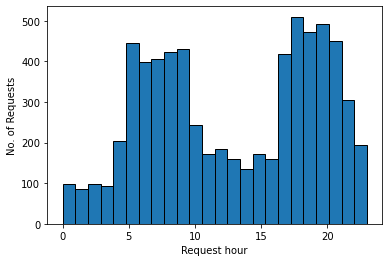

In [11]:
plt.hist(uber_data["Request hour"],edgecolor='black',bins=24)
plt.xlabel("Request hour")
plt.ylabel("No. of Requests")
plt.show()

# Session Details

1) EARLY MORNING = Midnight to 5AM

2) MORNING = 5AM to 10AM

3) DAY TIME = 10AM to 5PM

4) EVENING = 5PM to 10PM

5) LATE NIGHT = 10PM TO Midnight


In [12]:
#Divide the time of the day into five categories
def time_period(x):
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"

In [13]:
uber_data['Time slot'] = uber_data['Request hour'].apply(lambda x: time_period(x))
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


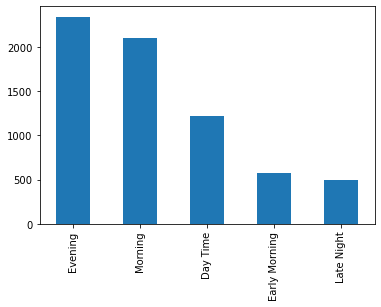

In [14]:
uber_data['Time slot'].value_counts().plot.bar()
plt.show()

# Observation:
As we can see in above plot, the demand is more in the evening hours

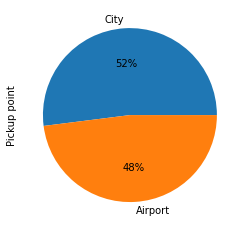

In [15]:
uber_data["Pickup point"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

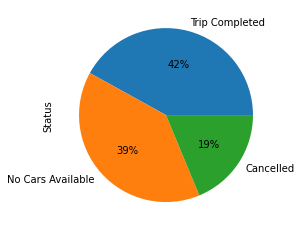

In [16]:
uber_data["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

# Observations:
From the above plot you can see, nearly 60% of the requests are either cancelled by the drivers (or) on wait due to the unavailabilty of cars

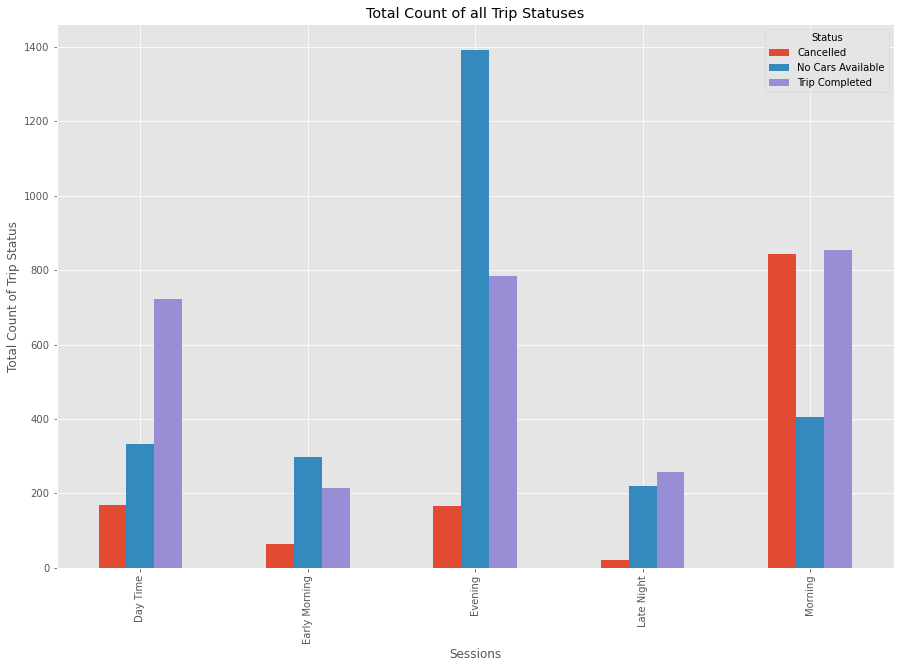

In [17]:
plt.style.use('ggplot')
uber_data.groupby(['Time slot','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10))
plt.title('Total Count of all Trip Statuses')
plt.xlabel('Sessions')
plt.ylabel('Total Count of Trip Status')
plt.show()

# Observations:
1) Maximum number of cancellations are being done during morning hours from 5AM to 10AM by the drivers, this happens mainly due to less demand for the cabs from airport to city. This might be due to few number of flight arrivals at the airport in the morning. So drivers are not willing to take the trip as they will not have a booking to return back to the city, hence they cancel the trip.

2) Customers find massive number of unavailable cars during evening hours from 5PM to 10PM, this could be due to huge number of flight arrivals and departures in the evening, that results in high demand for the cabs. Hence customers could not find a cab in the evening hours.

# POSSIBLE SOLUTION:
1) As we observe huge number of cancellations are being done during morning hours, I suggest uber management to provide some bonus for each trip and also some incentives for drivers during this hours

2) Uber can also put some offers for the customers during late nights where demand is low and if possible increase the number of cabs during busy hours which would be beneficial